In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,Reviewed in India on 6 March 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,Reviewed in India on 9 February 2024
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,Reviewed in India on 11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
...,...,...,...,...
105,4.0 out of 5 stars\nIt's real experience with ...,4.0,,Reviewed in India on 24 November 2023
106,4.0 out of 5 stars\nNice watch,4.0,It is very nice watch working properly price r...,Reviewed in India on 18 November 2023
107,4.0 out of 5 stars\nAwesome product,4.0,"Good product, value for money..",Reviewed in India on 22 November 2023
108,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,Reviewed in India on 24 February 2024


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
5,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
6,5.0 out of 5 stars\nDose not work,5.0,Products dose not work,27 February 2024
7,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


In [9]:
df.to_csv("BoatSmartWatch_Review.csv")

In [10]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
...,...,...,...,...
105,4.0 out of 5 stars\nIt's real experience with ...,4.0,NaN,24 November 2023
106,4.0 out of 5 stars\nNice watch,4.0,It is very nice watch working properly price r...,18 November 2023
107,4.0 out of 5 stars\nAwesome product,4.0,"Good product, value for money..",22 November 2023
108,5.0 out of 5 stars\nRich look,5.0,Lowest price and good quality,24 February 2024


In [11]:
reviews.Rating.describe()

count    110.000000
mean       4.181818
std        0.637970
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       107 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [13]:
reviews.isna().sum()

Title          0
Rating         0
Review         3
Review_Date    0
dtype: int64

In [14]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nNice product,5.0,Looks so good... Easy to use. Charging fast. C...,6 March 2024
1,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
2,5.0 out of 5 stars\nSmart watch,5.0,This smart watch is very nice and good quality...,11 March 2024
3,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


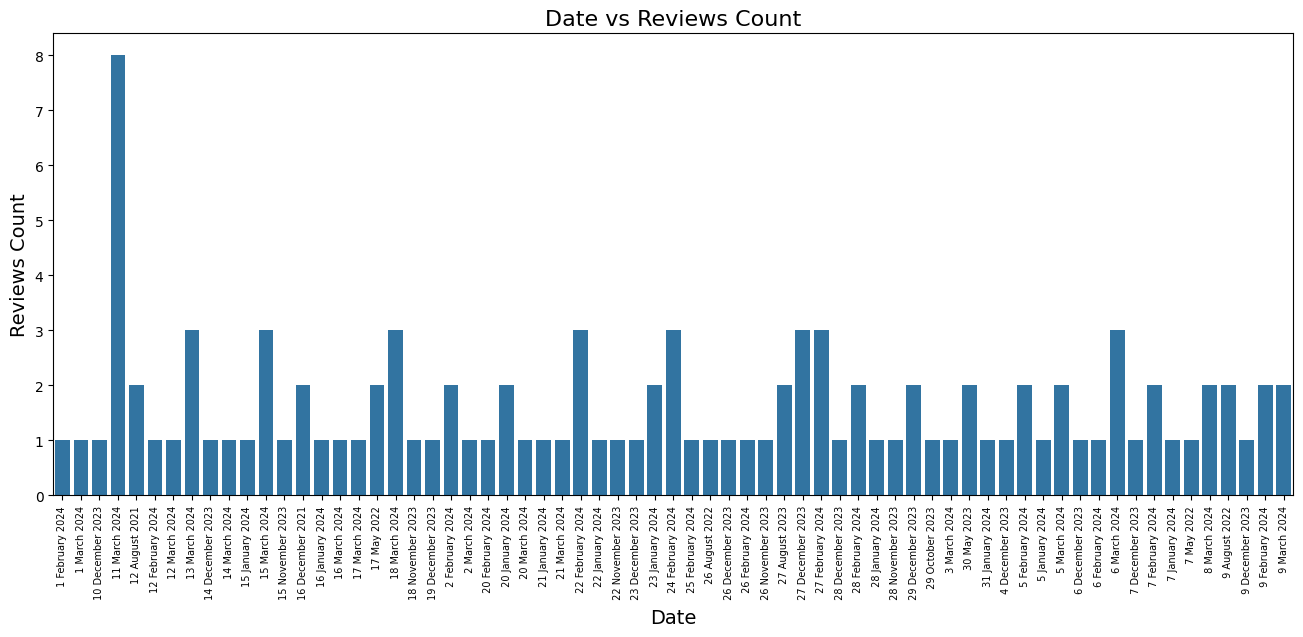

In [15]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

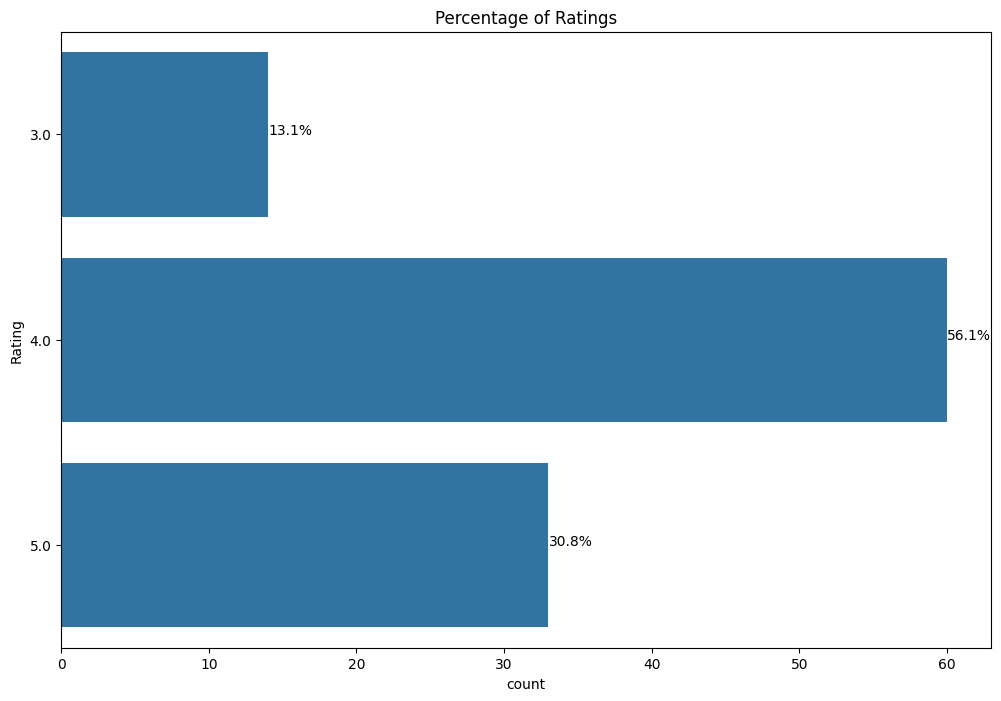

In [16]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [17]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Looks so good... Easy to use. Charging fast. C...
1    His smart watch is good value for money 💰. And...
2    His smart watch is very nice and good quality ...
3    The media could not be loaded.\n              ...
4    Shipping the parts mostly covered in other rev...
Name: Review, dtype: object

In [18]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Looks so good... Easy to use. Charging fast. C...
1,This smart watch is good value for money 💰. An...
2,This smart watch is very nice and good quality...
3,The media could not be loaded.\n ...
4,Skipping the parts mostly covered in other rev...
...,...
104,"Accuracy of all the readings sleep, walking, ..."
106,It is very nice watch working properly price r...
107,"Good product, value for money.."
108,Lowest price and good quality


In [19]:
boat_review.reset_index(drop=True, inplace=True)

In [22]:
!pip install nltk
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
!pip install wordnet
import wordnet
import nltk
nltk.download('wordnet')
!pip install wn
import wn

lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english") if wn.synsets(word)]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  0%|          | 0/107 [00:00<?, ?it/s]

In [38]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...
1,this smart watch good value money and feature ...,this smart watch good value money 💰. and featu...
2,this smart watch nice good quality boat company,this smart watch nice good quality boat company
3,the media could loaded used watch month now bo...,the media could loaded. used watch month now.....
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...


In [39]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [40]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...
1,this smart watch good value money and feature ...,this smart watch good value money 💰. and featu...
2,this smart watch nice good quality boat company,this smart watch nice good quality boat company
3,the media could loaded used watch month now bo...,the media could loaded. used watch month now.....
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,products dose work,products dose work
7,this smart model boat extend plus watch functi...,this smart (model boat extend plus) watch func...
8,review overviewaverage the boat today launched...,review overviewaverage2.7the boat today launch...
9,pros premium build quality matte finishing stu...,pros:1. premium build quality matte finishing-...


In [41]:
# Removing links (http/https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...
1,this smart watch good value money and feature ...,this smart watch good value money 💰. and featu...
2,this smart watch nice good quality boat company,this smart watch nice good quality boat company
3,the media could loaded used watch month now bo...,the media could loaded. used watch month now.....
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,products dose work,products dose work
7,this smart model boat extend plus watch functi...,this smart (model boat extend plus) watch func...
8,review overviewaverage the boat today launched...,review overviewaverage2.7the boat today launch...
9,pros premium build quality matte finishing stu...,pros:1. premium build quality matte finishing-...


In [42]:
# Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...
1,this smart watch good value money and feature ...,this smart watch good value money 💰. and featu...
2,this smart watch nice good quality boat company,this smart watch nice good quality boat company
3,the media could loaded used watch month now bo...,the media could loaded. used watch month now.....
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,products dose work,products dose work
7,this smart model boat extend plus watch functi...,this smart (model boat extend plus) watch func...
8,review overviewaverage the boat today launched...,review overviewaverage2.7the boat today launch...
9,pros premium build quality matte finishing stu...,pros:1. premium build quality matte finishing-...


In [43]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...
1,this smart watch good value money and feature ...,this smart watch good value money 💰. and featu...
2,this smart watch nice good quality boat company,this smart watch nice good quality boat company
3,the media could loaded used watch month now bo...,the media could loaded. used watch month now.....
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,products dose work,products dose work
7,this smart model boat extend plus watch functi...,this smart (model boat extend plus) watch func...
8,review overviewaverage the boat today launched...,review overviewaverage2.7the boat today launch...
9,pros premium build quality matte finishing stu...,pros:1. premium build quality matte finishing-...


In [44]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [45]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...
1,this smart watch good value money and feature ...,this smart watch good value money 💰. and featu...
2,this smart watch nice good quality boat company,this smart watch nice good quality boat company
3,the media could loaded used watch month now bo...,the media could loaded. used watch month now.....
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,my experience boat xtend call plus smart watch...,my experience boat xtend call plus smart watch...
6,products dose work,products dose work
7,this smart model boat extend plus watch functi...,this smart (model boat extend plus) watch func...
8,review overviewaverage the boat today launched...,review overviewaverage2.7the boat today launch...
9,pros premium build quality matte finishing stu...,pros:1. premium build quality matte finishing-...


In [63]:
!pip install gdown
import gdown

# Download the stopwords file
gdown.download(id='11ospNmg4PjEb9FECJPzOoG6qd-c9d_6q', output='stopwords.txt')

# Open the stopwords file and read its contents
with codecs.open('stopwords.txt', "r", encoding="ISO-8859-1") as s:
    stopwords = s.read()

# Print the first 101 characters of the stopwords file
print(stopwords[:101])

Downloading...
From: https://drive.google.com/uc?id=11ospNmg4PjEb9FECJPzOoG6qd-c9d_6q
To: /content/stopwords.txt
100%|██████████| 4.16k/4.16k [00:00<00:00, 3.82MB/s]

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [65]:
stopwords.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [75]:
!pip install nltk
import nltk.corpus
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
sw_list = ['stop']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,smart watch nice good quality boat company,this smart watch nice good quality boat company
3,media could loaded used watch month bought fir...,the media could loaded. used watch month now.....
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,products dose work,products dose work
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pros premium build quality matte finishing stu...,pros:1. premium build quality matte finishing-...


In [77]:
!pip install nltk
import nltk
nltk.download('punkt')

# Execute the following code after the download completes.
TextBlob(dataframe['Clean_Reviews'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['smart', 'watch', 'good', 'value', 'money', 'feature', 'packed', 'product', 'ip', 'rated', 'bought', 'months', 'ago', 'still', 'works', 'fine', 'thing', 'found', 'bad', 'vibration', 'sensor', 'satisfying', 'also', 'bit', 'laggy'])

In [78]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [looks, good, easy, use, charging, fast, charg...
1    [smart, watch, good, value, money, feature, pa...
2    [smart, watch, nice, good, quality, boat, comp...
3    [media, could, loaded, used, watch, month, bou...
4    [skipping, parts, mostly, covered, reviews, sp...
5    [experience, boat, xtend, call, plus, smart, w...
6                               [products, dose, work]
7    [smart, model, boat, extend, plus, watch, func...
8    [review, overviewaverage, boat, today, launche...
9    [pros, premium, build, quality, matte, finishi...
Name: Clean_Reviews, dtype: object

In [79]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...,"[looks, good, easy, use, charging, fast, charg..."
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa..."
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp..."
3,media could loaded used watch month bought fir...,the media could loaded. used watch month now.....,"[media, could, loaded, used, watch, month, bou..."
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...,"[skipping, parts, mostly, covered, reviews, sp..."
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
6,products dose work,products dose work,"[products, dose, work]"
7,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,pros premium build quality matte finishing stu...,pros:1. premium build quality matte finishing-...,"[pros, premium, build, quality, matte, finishi..."


In [80]:
stemmer = SnowballStemmer("english")

In [81]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,look good easi use charg fast charg stay long ...
1,smart watch good valu money featur pack produc...
2,smart watch nice good qualiti boat compani
3,media could load use watch month bought first ...
4,skip part most cover review sponsor yt one add...
...,...
102,accuraci read sleep walk hear stress suspect c...
103,nice watch work proper price rang nice must bu...
104,good product valu money
105,lowest price good qualiti


In [82]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,look good easy use charging fast charge stay l...
1,smart watch good value money feature packed pr...
2,smart watch nice good quality boat company
3,medium could loaded used watch month bought fi...
4,skipping part mostly covered review sponsored ...
...,...
102,accuracy reading sleep walking hear stress sus...
103,nice watch working properly price range nice m...
104,good product value money
105,lowest price good quality


In [83]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [85]:
print(cv.get_feature_names_out()[109:200])

['battery' 'bazei' 'beautiful' 'bed' 'beginning' 'believe' 'beneficial'
 'benefitsnow' 'best' 'better' 'beyond' 'bezels' 'big' 'bike' 'bip' 'bit'
 'black' 'bloated' 'blood' 'blue' 'bluetooth' 'boat' 'body' 'bother'
 'bought' 'box' 'boyfriend' 'bp' 'bpm' 'brand' 'break' 'breath'
 'breathing' 'bright' 'brightness' 'brings' 'browsing' 'brushed' 'bt'
 'budget' 'bugs' 'build' 'buildi' 'built' 'bulb' 'burn' 'burnt' 'button'
 'buy' 'buyers' 'buying' 'cable' 'cache' 'calculated' 'calculating'
 'calculations' 'calculator' 'calender' 'call' 'called' 'caller' 'callin'
 'calling' 'calls' 'calorie' 'calories' 'calory' 'cals' 'came' 'camera'
 'cannot' 'carddesign' 'care' 'cart' 'case' 'cases' 'category' 'catering'
 'change' 'changed' 'charge' 'charger' 'charges' 'charging' 'charm'
 'cheap' 'check' 'checked' 'checking' 'childish' 'chinese']


In [87]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accessibility' 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'ach' 'ackward' 'acticity'
 'activate' 'activating' 'active' 'activites' 'activities' 'activity'
 'actual' 'actually' 'adapter' 'add' 'added' 'addition' 'adds' 'adjust'
 'advanced' 'advertised' 'aggregate' 'ago' 'alarm' 'alarms' 'alert'
 'alerts' 'alexa' 'allowed' 'allowing' 'almost' 'along' 'also'
 'alternative' 'aluminium' 'always' 'amaze' 'amazfit' 'amazing' 'amazon'
 'amoled' 'amount' 'analog' 'android' 'angle' 'animals' 'animation'
 'animations' 'anniversary' 'another' 'answer' 'anyone' 'anything'
 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'appeared' 'apple' 'apps' 'appyou'
 'around' 'arre' 'asakte' 'aside' 'asks' 'aspect' 'aspects' 'assistant'
 'assisted' 'atm' 'attached' 'attaching' 'attention' 'attractive' 'audio'
 'audios' 'auto' 'availab

In [88]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [89]:
dataframe = dataframe.reset_index(drop=True)

In [90]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [91]:
corpus[3]

'media could load use watch month bought first sale keep read unbias review tip trick ensur function watch work smoothli larg curv display price categori inch batteri heavi usag frequent wake screen alexa alarm notif day standbi check time occassion day pretti good full charg time hour decent qualiti magnet charg cabl provid use low power adapt power bank laptop necessari health workout track option spo oxymet heart rate monitor accuraci sleep track pretti accur paedomet accur time sometim hundr step ad randomli without activ happen randomli day stress monitor also sure calcul sensor fake probabl watch contact skin display warn messag display data lift wake gestur work second delay manag tap wake function work popular notif whatsapp sm facebook instagram etc read entir sm watch messag unless long call pick silenc see caller id reject call bt music control weather updat alexa usabl smart featur differ watch face avail boat wave app realli good also customis wallpap watch face see post p

In [92]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [93]:
X.shape

(106, 1546)

In [95]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa'], dtype=object)

In [96]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [98]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,yt one
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,3,1,1,1,3,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,1,0,0,1,0,0,6,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [100]:
corpus[4]

'skip part mostli cover review sponsor yt one add irrit common sens disappoint notic sinc last day actual usag smart watch aod show date day week show hour min way configur beyond analog digit view also get turn start exercis activ like walk screen goe dark go walk calori count home screen anywher els show step count calori aggreg calori burnt exercis activ e step cal cycl show home screen separ two entri app smart enough addit quick way go start activ exercis first press side button twice select activit list menu versu swipe home screen goe utterli useless cricket score screen instead mani even use customis menu option function map provid touch wake display avail screen avail rupe yr old huwai band one press side button everi time see home screen utterli inconveni reach day night time auto configur aod twist wake provid make irrit sleep hour kept thu daili two time day task enabl disabl featur manual everi freak day kindli also note indic whatsoev aod start exercis activ start one lik

In [101]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [102]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [104]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa'], dtype=object)

In [105]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [107]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ includ,...,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye,yt one
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.028955,0.068297,0.022766,0.027448,0.027448,0.06298,0.0,...,0.0,0.000000,0.023477,0.0,0.0,0.0,0.0,0.027448,0.024273,0.000000
4,0.0,0.027605,0.025744,0.000000,0.000000,0.024963,0.000000,0.000000,0.13812,0.0,...,0.0,0.026616,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.033881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.0,0.000000,0.000000,0.000000,0.000000,0.299303,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
102,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
103,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
104,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [108]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'looks good easy use charging fast charges stay long time smart watch good value money feature packed product ip rated bought months ago still works fine thing found bad vibration sensor satisfying also bit laggy smart watch nice good quality boat company media could loaded used watch month bought first sale keep reading unbiased review tips tricks ensure functions watch working smoothly large curved display price category inch battery heavy usage frequently waking screen alexa alarms notifications days standby checking time occassionally days pretty good full charging time hours decent quality magnetic charging cable provided use low power adapter power bank laptop necessary health workout tracking options spo oxymeter heart rate monitor accuracy sleep tracking pretty accurate paedometer accurate times sometimes hundred steps added randomly without activity happens randomly days stress monitor also sure calculated sensors fake probably watch contact skin display warning message displa

In [109]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [110]:
for token in doc_block[:50]:
    print(token,token.pos_)

looks VERB
good ADJ
easy ADJ
use NOUN
charging VERB
fast ADJ
charges NOUN
stay VERB
long ADJ
time NOUN
smart ADJ
watch VERB
good ADJ
value NOUN
money NOUN
feature NOUN
packed VERB
product NOUN
ip NOUN
rated VERB
bought VERB
months NOUN
ago ADV
still ADV
works VERB
fine ADJ
thing NOUN
found VERB
bad ADJ
vibration NOUN
sensor NOUN
satisfying VERB
also ADV
bit NOUN
laggy PROPN
smart ADJ
watch VERB
nice ADJ
good ADJ
quality NOUN
boat NOUN
company NOUN
media NOUN
could AUX
loaded VERB
used ADJ
watch NOUN
month NOUN
bought VERB
first ADJ


In [111]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['works', 'notifications', 'read', 'sms', 'watch', 'messages', 'calls', 'picked', 'silenced', 'caller', 'reject', 'call', 'music', 'control', 'weather', 'update', 'features', 'watch', 'face', 'boat', 'wave', 'app', 'customised', 'wallpapers', 'watch', 'faces', 'see', 'posted', 'pictures', 'boat', 'wave', 'app', 'organized', 'syncs', 'health', 'data', 'issues', 'assisted', 'functionality', 'track', 'running', 'activities', 'map', 'case', 'need', 'data', 'user', 'interface', 'smooth', 'note', 'animations', 'transitions', 'use', 'touch', 'screen', 'response', 'feels', 'construction', 'sturdy', 'feels', 'wear', 'water', 'resistance', 'atm', 'take', 'duration', 'pool', 'shower', 'rain', 'worries', 'watch', 'body', 'brushed', 'aluminium', 'body', 'quality', 'plastic', 'straps', 'quality', 'skin', 'wearing', 'durations', 'colour', 'options', 'matching', 'straps', 'straps', 'replaced', 'straps', 'works', 'tested', 'tips', 'tricks', 'boat', 'wave', 'app', 'needs', 'run', 'background', 'time']


In [112]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,188
1,boat,93
2,time,59
3,smartwatch,54
4,display,48
5,xtend,45
6,features,43
7,use,42
8,app,41
9,feature,39


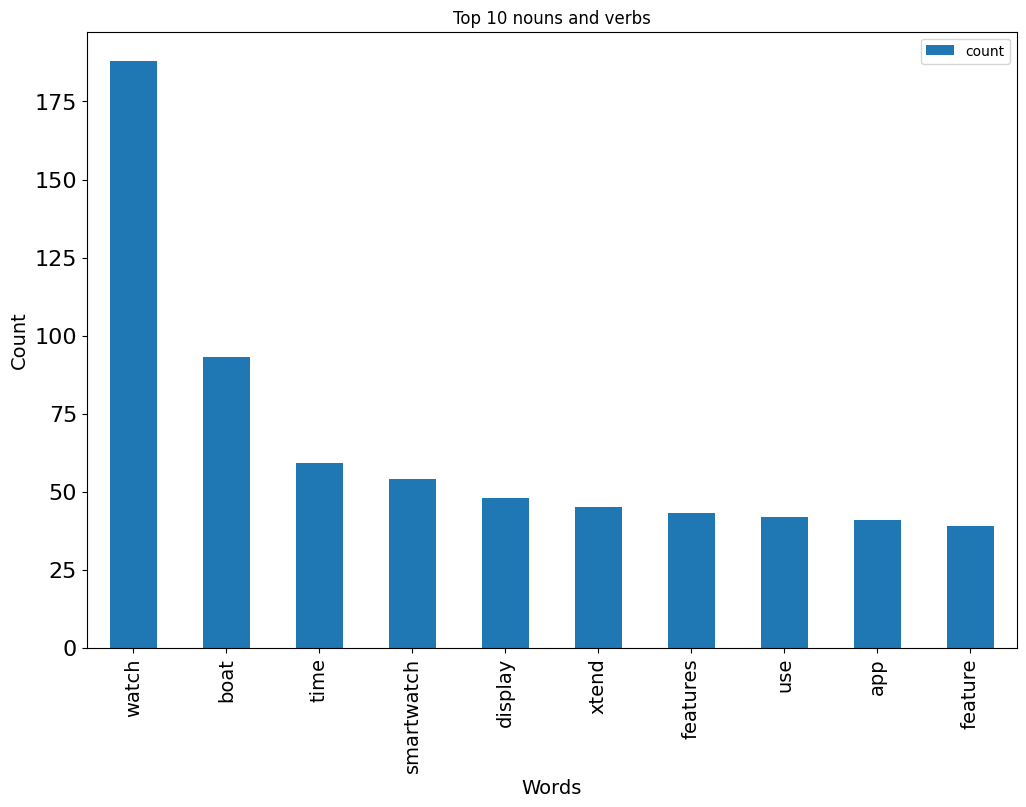

In [113]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [114]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [115]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [116]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [117]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,105
neg,1


In [118]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...,"[looks, good, easy, use, charging, fast, charg...",0.608333,0.320833
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa...",0.681905,0.226190
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp...",0.747619,0.504762
3,media could loaded used watch month bought fir...,the media could loaded. used watch month now.....,"[media, could, loaded, used, watch, month, bou...",0.474818,0.127648
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...,"[skipping, parts, mostly, covered, reviews, sp...",0.441925,0.011749


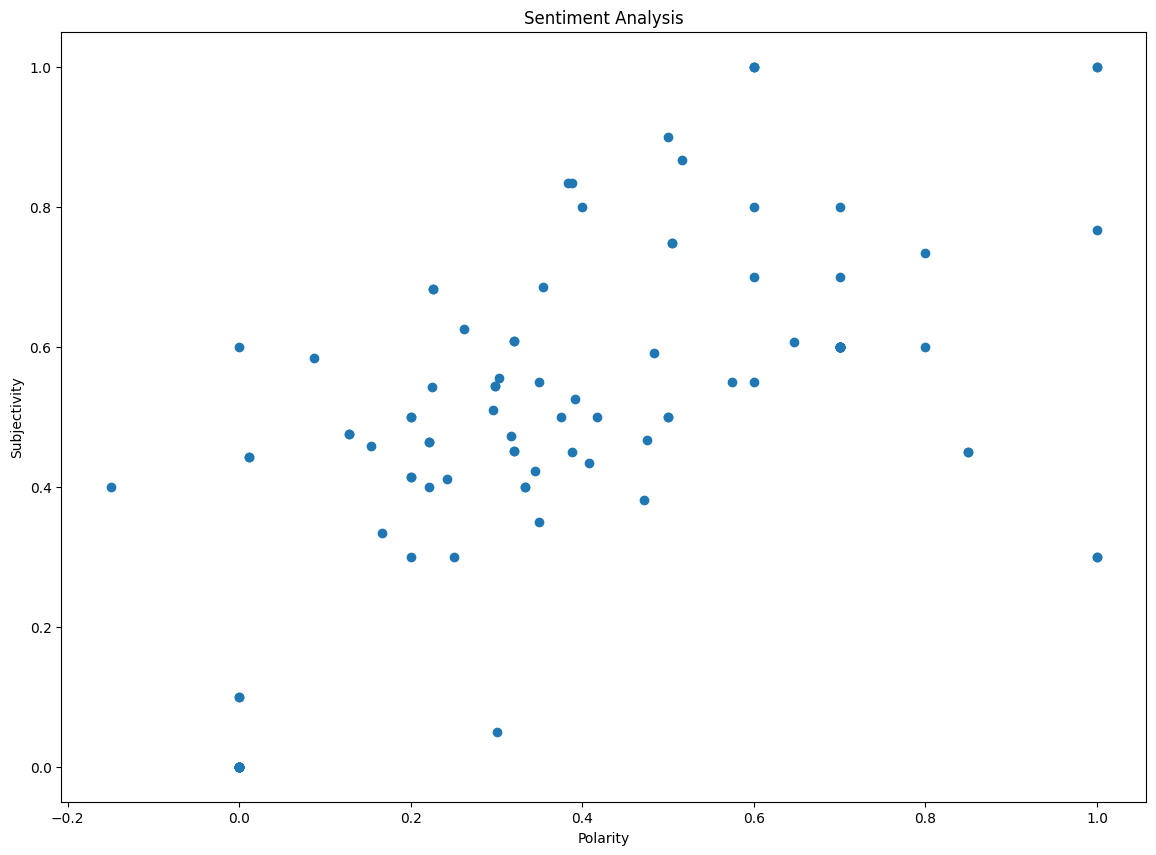

In [119]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [120]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,looks good easy use charging fast charges stay...,looks good... easy use. charging fast. charges...,"[looks, good, easy, use, charging, fast, charg...",0.608333,0.320833,pos
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa...",0.681905,0.226190,pos
2,smart watch nice good quality boat company,this smart watch nice good quality boat company,"[smart, watch, nice, good, quality, boat, comp...",0.747619,0.504762,pos
3,media could loaded used watch month bought fir...,the media could loaded. used watch month now.....,"[media, could, loaded, used, watch, month, bou...",0.474818,0.127648,pos
4,skipping parts mostly covered reviews sponsore...,skipping parts mostly covered reviews sponsore...,"[skipping, parts, mostly, covered, reviews, sp...",0.441925,0.011749,pos


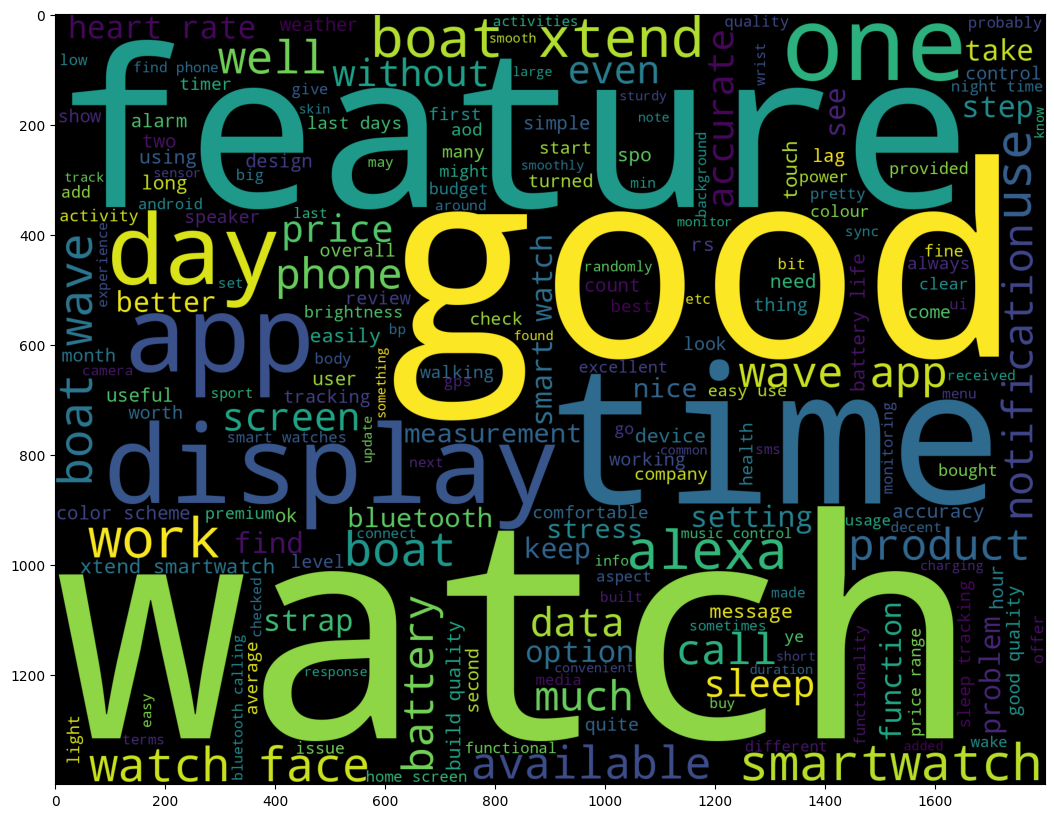

In [121]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [122]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

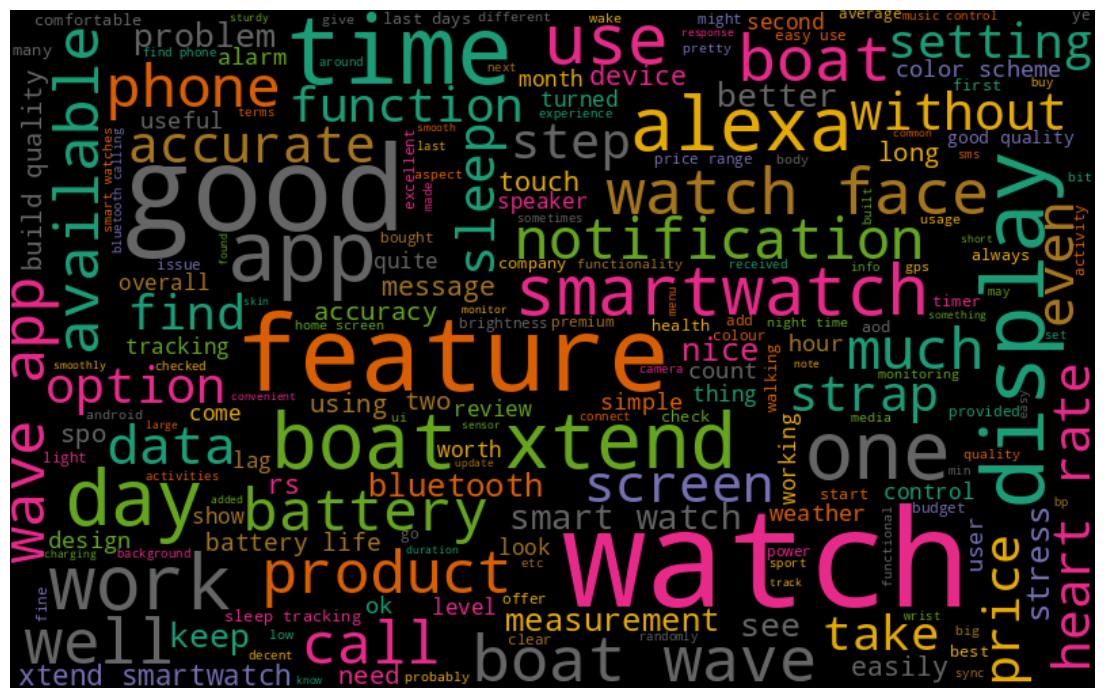

In [123]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

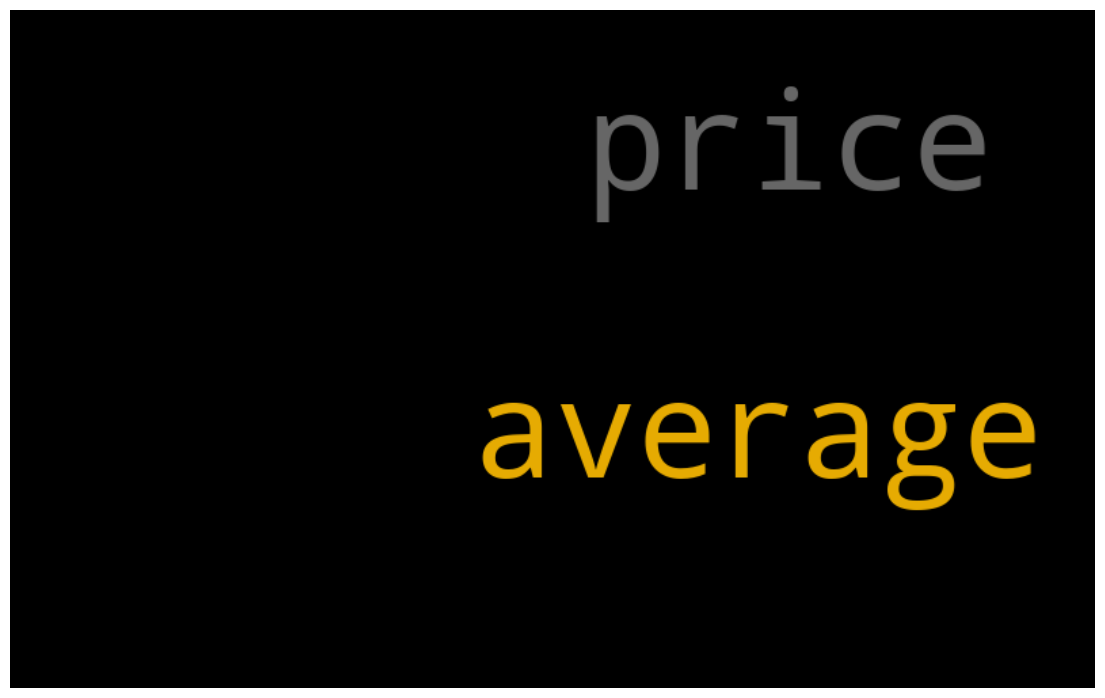

In [124]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)